In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [34]:
# Вводим ID Получаем  -> list ["ID", "%", "Вывод", "Рекомендации"]

class ML_AGEENT:
    def __init__(self) -> None:
        self.dataframe_interesting = pd.read_excel("Интересы.xls")
        self.dataframe_waitings = pd.read_excel("Обращения.xls")
        self.dataframe_transporting = pd.read_excel("Сортированный_Объем Перевозок.xlsx")
        self.dataframe_Vladimyr = pd.read_excel("МС_Владимирская область.xls")
        self.dataframe_Kirov = pd.read_excel("МС_Кировская область.xls")
        self.dataframe_NNov = pd.read_excel("МС_Нижегородская область.xls")
        self.dataframe_MaryEl = pd.read_excel("МС_Республика Марий Эл.xls")
        self.dataframe_Mordoviya = pd.read_excel("МС_Республика Мордовия.xls")
        self.dataframe_Tatarstan = pd.read_excel("МС_Республика Татарстан.xls")
        self.dataframe_Ydmurt = pd.read_excel("МС_Республика Удмуртия.xls")
        self.dataframe_Chyvash = pd.read_excel("МС_Республика Чувашия.xls")
        self.oblast_list = [
                            self.dataframe_Vladimyr, 
                            self.dataframe_Kirov, 
                            self.dataframe_NNov, 
                            self.dataframe_MaryEl, 
                            self.dataframe_Mordoviya, 
                            self.dataframe_Tatarstan,
                            self.dataframe_Ydmurt,
                            self.dataframe_Chyvash
                            ]

    def research(self, id:str) -> list:
        
        _, personal_data = self.research_oblasts(id)
        _, personal_seasons = self.seasons(id)
        
        prompt = ""
        ...
    
    def research_oblasts(self, id:str) -> str:
        for i in self.oblast_list:
            filtred = i[i["ID"] == id][["ID",
                                        "Размер компании.Наименование", 
                                        "Карточка клиента (внешний источник).Индекс платежной дисциплины Описание", 
                                        "Карточка клиента (внешний источник).Индекс финансового риска Описание", 
                                        "Госконтракты.Тип контракта"]]
            if len(filtred.values.tolist()) >=1:
                break
            else:
                pass
        
        all_data = filtred.values.T.tolist()
        print(all_data[0], all_data[1])
        all_data = [list(set(sublist)) for sublist in all_data]
        print(all_data[0], all_data[1])
        
        final = "Этот клиент - " +   str(all_data[1]) + " C " + str(all_data[2]) + " С индексом финального риска: " + str(all_data[3]) + " И в гос контрактах он является: " + str(all_data[4])
        print(final)
        return filtred, final
    
    def seasons(self, id:str) ->  str:
        
        filtred = self.dataframe_transporting[self.dataframe_transporting["ID"] == id]
        years = filtred.columns.values.tolist()[5:]
        month = filtred[years].values.T.tolist()
        month_normal = years[0::2]
        month_in_numbers =  [[sum(subarray)] for subarray in month]
        month_in_tons = month_in_numbers[1::2]
        month_in_money = month_in_numbers[0::2]
        text = ""
        for i in range(len(month_normal)):
            text += f"Клиент в год, месяц - {month_normal[i]} перевёз {month_in_tons[i]} тон груза  на сумму: {month_in_money[i]}\n"
            
        print(text)
        
        return filtred, text
    
    def research_interesting(self, id:str) -> str:
        filtred = self.dataframe_interesting[self.dataframe_interesting["ID"] == id]
    
        all_data = filtred.values.T.tolist()
        print(all_data[0], all_data[1])
        all_data = [list(set(sublist)) for sublist in all_data]
        print(all_data[0], all_data[1])
        
        return filtred
    def research_waitings(self, id:str) -> str:
        filtred = self.dataframe_waitings[self.dataframe_waitings["ID"] == id]
    
        all_data = filtred.values.T.tolist()
        print(all_data[0], all_data[1])
        all_data = [list(set(sublist)) for sublist in all_data]
        print(all_data[0], all_data[1])
        
        return filtred
    
    def grafic(self,id:str):
        filtred = self.dataframe_transporting[self.dataframe_transporting["ID"] == id]
        date_list = [
                    "2022/01", "2022/02", "2022/03",
                    "2022/04", "2022/05", "2022/06",
                    "2022/07", "2022/08", "2022/09",
                    "2022/10", "2022/11","2022/12",
                    "2023/01", "2023/02","2023/03",
                    "2023/04", "2023/05","2023/06",
                    "2023/07","2023/08", "2023/09",
                    "2023/10","2023/11","2023/12",
                    "2024/01","2024/02","2024/03",
                    "2024/04","2024/05","2024/06",
                    "2024/07", "2024/08"
                ]
        plt.figure()
        plt.plot(date_list)
        plt.plot(filtred["ID"])
        plt.show()
 

In [35]:
agent = ML_AGEENT()

In [36]:
id = 1923
agent.research_interesting(id)

['03.05.2024 15:27', '09.04.2024 17:44', '10.08.2023 09:33', '12.08.2022 11:42', '16.05.2024 15:15', '21.02.2024 12:52', '22.07.2022 15:40'] ['Привлечение клиента на новое направление Слободское-Сегежа статья сбора 041', 'Привлечение клиента на новое направление Слободское-Онега код статьи 041', '"РЖД Маркет"', '"РЖД Маркет"', 'Услуга "МТК Север-Юг".', 'Привлечение клиента на новое направление Слободское-Говсан статья сбора 041', 'РЖД Маркет']
['16.05.2024 15:15', '21.02.2024 12:52', '22.07.2022 15:40', '09.04.2024 17:44', '03.05.2024 15:27', '12.08.2022 11:42', '10.08.2023 09:33'] ['Привлечение клиента на новое направление Слободское-Говсан статья сбора 041', 'Услуга "МТК Север-Юг".', 'Привлечение клиента на новое направление Слободское-Сегежа статья сбора 041', 'Привлечение клиента на новое направление Слободское-Онега код статьи 041', '"РЖД Маркет"', 'РЖД Маркет']


,Дата,Тема,Сценарий,Состояние,ID,Подразделение,Ожидаемая выручка,"Вероятность сделки, %",Дата следующей активности,Следующая активность,Канал первичного интереса,Номер,Ссылка (служебное поле для вывода на экран прочих реквизитов объекта)
1165,03.05.2024 15:27,Привлечение клиента на новое направление Слобо...,6. Продажа услуг действующим клиентам,Завершен успешно,1923,ЦПУ МУРАШИ,NaN,100.0,NaN,NaN,10. Холодный звонок,0001-114775,"Интерес ""Привлечение клиента на новое направле..."
4341,09.04.2024 17:44,Привлечение клиента на новое направление Слобо...,6. Продажа услуг действующим клиентам,Завершен неудачно,1923,ЦПУ МУРАШИ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-092844,"Интерес ""Привлечение клиента на новое направле..."
5007,10.08.2023 09:33,"""РЖД Маркет""",3. РЖД Маркет,"Привлечение на ""РЖД Маркет""",1923,ЦПУ НИЖНИЙ НОВГОРОД,NaN,10.0,21.08.2023 9:33:47,"""РЖД Маркет"" (Проведение переговоров)",NaN,0001-209846,"Интерес """"РЖД Маркет"""" от 10.08.2023"
6406,12.08.2022 11:42,"""РЖД Маркет""",3. РЖД Маркет,Отказ в работе,1923,ЦПУ НИЖНИЙ НОВГОРОД,NaN,NaN,12.09.2022 12:00:00,Телефонный звонок клиенту,10. Холодный звонок,0000-975816,"Интерес """"РЖД Маркет"""" от 12.08.2022"
8875,16.05.2024 15:15,"Услуга ""МТК Север-Юг"".",6. Продажа услуг действующим клиентам,Завершен неудачно,1923,ЦПУ МУРАШИ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-125173,"Интерес ""Услуга ""МТК Север-Юг""."" от 16.05.2024"
11651,21.02.2024 12:52,Привлечение клиента на новое направление Слобо...,6. Продажа услуг действующим клиентам,Завершен успешно,1923,ЦПУ МУРАШИ,NaN,100.0,NaN,NaN,10. Холодный звонок,0001-047494,"Интерес ""Привлечение клиента на новое направле..."
12769,22.07.2022 15:40,РЖД Маркет,1.Продажа ЦФТО,Заключение договора,1923,ЦПУ НИЖНИЙ НОВГОРОД,NaN,60.0,NaN,NaN,10. Холодный звонок,0000-966000,"Интерес ""РЖД Маркет"" от 22.07.2022"


['01.02.2024 10:04', '05.10.2023 09:38', '18.04.2023 13:50', '19.09.2023 08:44'] ['Оформление документов связанных с перевозкой грузов: Заявка ГУ-12', 'Оформление документов связанных с перевозкой грузов: Заявка ГУ-12', 'Оформление документов связанных с перевозкой грузов: Заявка ГУ-12', 'Оформление документов связанных с перевозкой грузов: Заявка ГУ-12'] ['Обращение', 'Обращение', 'Обращение', 'Обращение']
['01.02.2024 10:04', '19.09.2023 08:44', '18.04.2023 13:50', '05.10.2023 09:38'] ['Оформление документов связанных с перевозкой грузов: Заявка ГУ-12'] ['Обращение']


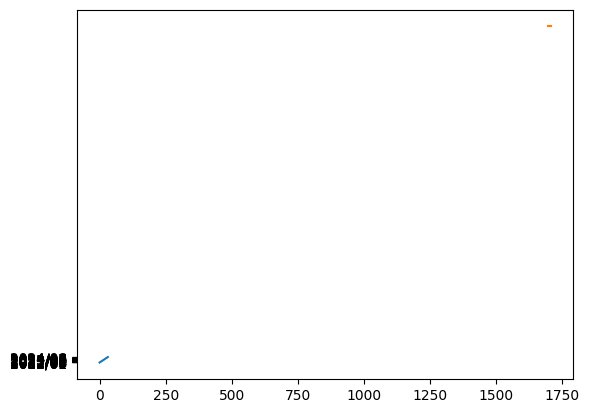

In [37]:
agent.research_waitings(id)
agent.grafic(id)